# 03. Neural Networks

In order to try the creation of neural networks in Julia, we will use the well-known MINST dataset. 
    
As a language that leans towards numerical computation, it’s no surprise that Julia offers a number of choices for doing deep learning, here are the stable libraries:

 - Flux.jl - The Elegant Machine Learning Stack.
 - Knet.jl - Koç University deep learning framework.
 - MLJ.jl - Julia machine learning framework by Alan Turing Institute.
 - MXNet.jl - Apache MXNet Julia package.
 - TensorFlow.jl - A Julia wrapper for TensorFlow. 
 
 In this ocasion, we will use the Flux.jl package.

In [2]:
using Flux, Flux.Data.MNIST
using Flux:onehotbatch, argmax, crossentropy, throttle
using Base.Iterators:repeated
using Images

## Data preprocessing

Load the MNIST images and the labels.

In [118]:
imgs_train = MNIST.images();
imgs_test = MNIST.images(:test);

In [119]:
labels_train = MNIST.labels();
labels_test = MNIST.labels(:test);

In [120]:
@show size(imgs_train)
@show size(labels_train);
@show size(imgs_test);
@show size(labels_test);

size(imgs_train) = (60000,)
size(labels_train) = (60000,)
size(imgs_test) = (10000,)
size(labels_test) = (10000,)


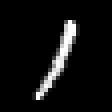

In [121]:
colorview(Gray, imgs[100])

Transform the gray scale values into Float32 and vectorize the images.

In [122]:
myFloat32(x) = Float32.(x);
vectorize(x) = x[:];

In [123]:
ftp_imgs_train = myFloat32.(imgs_train)
ftp_imgs_test = myFloat32.(imgs_test);

@show size(ftp_imgs_train)
@show typeof(ftp_imgs_train);

size(ftp_imgs_train) = (60000,)
typeof(ftp_imgs_train) = Array{Array{Float32,2},1}


In [130]:
vec_imgs_train = vectorize.(ftp_imgs_train)
vec_imgs_test = vectorize.(ftp_imgs_test);

@show size(vec_imgs_train)
@show typeof(vec_imgs_train);

size(vec_imgs_train) = (60000,)
typeof(vec_imgs_train) = Array{Array{Float32,1},1}


Concatenate all images in one matrix.

In [88]:
X_train = hcat(vec_imgs_train...);
X_test = hcat(vec_imgs_test...);
@show size(X_train)
@show size(X_test);

size(X_train) = (784, 60000)
size(X_test) = (784, 10000)


Every column in X is an image of a number. There are 60,000 images for training and 10.000 for testing. We can reshape a column into a 28x28 matrix and display the corresponding images.

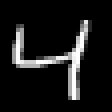

In [94]:
figure = X_train[:,3]
t1 = reshape(figure, 28, 28)
colorview(Gray, t1)

Encode the labels en formato *OneHot*.

In [163]:
Y_train = Flux.onehotbatch(labels_train, 0:9)

10×60000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  0  1  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  1  0  1     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  0  …  0  0  0  0  0  1  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  0  0  0  0  0  1  0  0  0  1
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  1  0  1  0  0  0  0  0  0  0

In [164]:
@show size(X_train)
@show size(Y_train)
@show size(X_test)

size(X_train) = (784, 60000)
size(Y_train) = (10, 60000)
size(X_test) = (784, 10000)


(784, 10000)

## Build the Neural Network

The neural network will have one single hidden layer with 32 neurons  and *relu* activation and a output layer (with obviously 10 nodes)with *softwax* activation.

In [100]:
# Dimensions
INPUT_SIZE = size(X_train,1)
HIDDEN_SIZE = 32
OUTPUT_SIZE = 10;

In [101]:
input_layer = Flux.Dense(INPUT_SIZE, HIDDEN_SIZE, Flux.relu)
hidden_layer = Flux.Dense(HIDDEN_SIZE, OUTPUT_SIZE);

In [102]:
network = Flux.Chain(input_layer, hidden_layer, Flux.softmax)

Chain(Dense(784, 32, relu), Dense(32, 10), softmax)

## Train the network 

In [108]:
loss(x, y) = Flux.crossentropy(network(x), y)
ps = Flux.params(network)
data = Iterators.repeated((X_train,Y_train), 200)
opt = Flux.ADAM()
evalcb = () -> @show(loss(X_train,Y_train));

In [109]:
Flux.train!(loss, ps, data, opt, cb = throttle(evalcb,10))

loss(X_train, Y_train) = 0.2856005f0
loss(X_train, Y_train) = 0.22999921f0
loss(X_train, Y_train) = 0.19141106f0
loss(X_train, Y_train) = 0.16281606f0
loss(X_train, Y_train) = 0.14071596f0
loss(X_train, Y_train) = 0.12313181f0
loss(X_train, Y_train) = 0.108887665f0


## Test the network

In [167]:
predictions = mapslices(argmax,network(X_test),dims=1)[:] .-1

10000-element Array{Int64,1}:
 7
 2
 1
 0
 4
 1
 4
 9
 6
 9
 0
 6
 9
 ⋮
 5
 6
 7
 8
 9
 0
 1
 2
 3
 4
 5
 6

In [173]:
accuracy = sum(predictions .== labels_test) / size(labels_test,1)

0.957